In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.io as pyo
pyo.renderers.default='iframe'
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('moviestreams.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
df.shape

(16744, 17)

In [4]:
cols = df.columns.tolist()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [5]:
df.drop(['Unnamed: 0', 'ID'], axis = 1, inplace=True )

cols = df.columns.tolist()

cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

## Checking For Missing Data

In [6]:
df.isna().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [7]:
df.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [8]:
df['Age']

0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Age, Length: 16744, dtype: object

In [9]:
age_map = {'18+':18,'7+':7,'13+':13,'All':0,'16+':16}

df['AgeCopy']  = df['Age'].map(age_map)

df['AgeCopy']

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
16739     NaN
16740     7.0
16741     NaN
16742     NaN
16743     NaN
Name: AgeCopy, Length: 16744, dtype: float64

In [10]:
df['new_Rotten_Tomatoes'] = df['Rotten Tomatoes'].str.replace('%','')



for i in df['new_Rotten_Tomatoes']:
    if i == str:
        i.astype(int)
# OR
# df['new_Rotten_Tomatoes'] = df['new_Rotten Tomatoes'].astype(int)


# Visualisation

## Q. What is the number of MOVIES for each age group?

In [11]:
df['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

## Q. Top 10 languages in Streaming Services

In [12]:
df.Language.value_counts()

English                                                                             10955
Hindi                                                                                 503
English,Spanish                                                                       276
Spanish                                                                               267
English,French                                                                        174
                                                                                    ...  
English,German,Hungarian,Romanian                                                       1
English,Spanish,Chinese,Latin                                                           1
English,Danish,Malay,Dutch,Indonesian,Finnish,Luxembourgish,French Sign Language        1
Dutch,French                                                                            1
English,Algonquin                                                                       1
Name: Lang

<AxesSubplot:title={'center':'Top 10 Languages in Streaming Services'}>

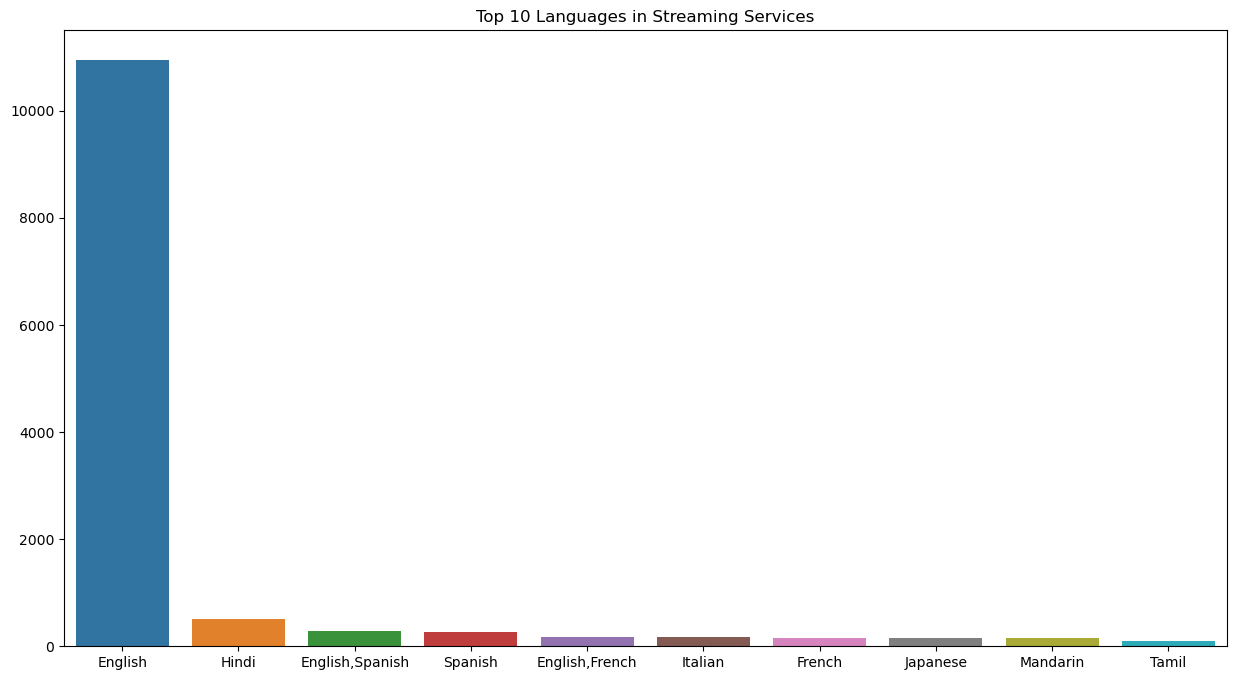

In [13]:
language = df.Language.value_counts().head(10)

plt.figure(figsize=(15,8))
plt.title('Top 10 Languages in Streaming Services')
sns.barplot(x=language.index,y=language.values)

In [14]:
from IPython.display import HTML
import plotly.express as px

fig = px.pie(df,
           values=language.values,
           names=language.index,
           title='Top 10 Languages in Streaming Services')

HTML(fig.to_html())
fig.show()

## Q. Numbers of movies in specific age group in All services

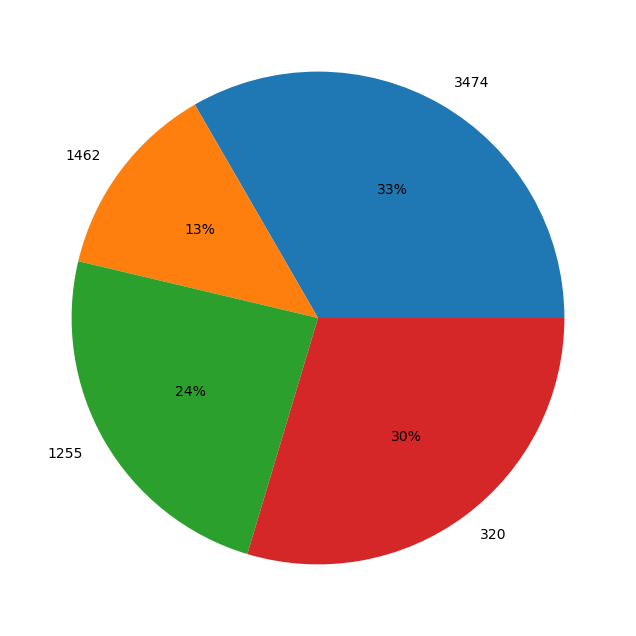

In [15]:
plt.figure(figsize=(15,8))
plt.pie(df['AgeCopy'].value_counts().index,labels=df['AgeCopy'].value_counts(),autopct='%.0f%%')
plt.show()


In [16]:
from IPython.display import HTML
import plotly.express as px


fig = px.bar(df,
           x=df['Age'].value_counts().index,
           y=df['Age'].value_counts(),
           title="Number of Movies in speccific age group in ALL Services",
           text=df['Age'].value_counts(),
           height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

## Q. Number of movies in specific age group in Netflix

In [17]:
from IPython.display import HTML
import plotly.express as px
 
netflix_df=df[df['Netflix']==1]
    
fig = px.bar(netflix_df,
           x=netflix_df['Age'].value_counts().index,
           y=netflix_df['Age'].value_counts(),
           title="Number of Movies in speccific age group in Netflix",
           text=netflix_df['Age'].value_counts(),
           height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

## Q. Number of movies in specific age group in Amazon Prime

In [18]:
from IPython.display import HTML
import plotly.express as px
 
prime_df=df[df['Prime Video']==1]
    
fig = px.bar(prime_df,
           x=prime_df['Age'].value_counts().index,
           y=prime_df['Age'].value_counts(),
           title="Number of Movies in speccific age group in Amazon Prime",
           text=prime_df['Age'].value_counts(),
           height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

## Q. Number of movies in specific age group in Disney+

In [19]:
from IPython.display import HTML
import plotly.express as px
 
disney_df=df[df['Disney+']==1]
    
fig = px.bar(disney_df,
           x=disney_df['Age'].value_counts().index,
           y=disney_df['Age'].value_counts(),
           title="Number of Movies in speccific age group in Disney+",
           text=disney_df['Age'].value_counts(),
           height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

## Q. Number of movies in specific age group in Hulu

In [20]:
from IPython.display import HTML
import plotly.express as px
 
hulu_df=df[df['Hulu']==1]
    
fig = px.bar(hulu_df,
           x=hulu_df['Age'].value_counts().index,
           y=hulu_df['Age'].value_counts(),
           title="Number of Movies in speccific age group in Hulu",
           text=hulu_df['Age'].value_counts(),
           height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

# Rotten Tomatoes Score

## Q. Rotten tomato ratimg for All Services

In [21]:
from IPython.display import HTML
import plotly.express as px
     
fig = px.bar(df,
           x=df['Rotten Tomatoes'].value_counts().index,
           y=df['Rotten Tomatoes'].value_counts(),
           title="Overall Rotten Tomatoes Rating",
           text=df['Rotten Tomatoes'].value_counts(),
           height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

## Q. Rotten tomato ratimg for Each Services

In [22]:
rt_scores=pd.DataFrame({'Streaming Service' :['Prime Video','Hulu','Disney+','Netflix'],
 'Rotten Tomatoes Score':[netflix_df['Rotten Tomatoes'].value_counts()[0],
                          hulu_df['Rotten Tomatoes'].value_counts()[0],
                          disney_df['Rotten Tomatoes'].value_counts()[0],
                          prime_df['Rotten Tomatoes'].value_counts()[0]
                      
     ]})

rt_scores.head()

,Streaming Service,Rotten Tomatoes Score
0,Prime Video,130
1,Hulu,18
2,Disney+,19
3,Netflix,257


In [23]:
sort_rt_scores=rt_scores.sort_values(ascending=False,by='Rotten Tomatoes Score')

sort_rt_scores

,Streaming Service,Rotten Tomatoes Score
3,Netflix,257
0,Prime Video,130
2,Disney+,19
1,Hulu,18


In [24]:
fig = px.bar(sort_rt_scores,
           x=sort_rt_scores['Streaming Service'],
           y=sort_rt_scores['Rotten Tomatoes Score'],
           title="Rotten Tomatoes Rating For Each Service",
           text=sort_rt_scores['Rotten Tomatoes Score'],
           height=600)
fig.update_traces(marker_color='purple' ,texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

# IMDB Ratings

In [25]:
fig = px.bar(df,
           x=df['IMDb'].value_counts().index,
           y=df['IMDb'].value_counts(),
           title="Overall IMDb Ratings",
           text=df['IMDb'].value_counts(),
           height=600)
fig.update_traces(marker_color='red' ,texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

## Count of Runtime of Movies

In [26]:
RuntimeCount = pd.DataFrame(dict(df['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(),
               columns=['Runtime','Count'])

In [27]:
RuntimeCount

,Runtime,Count
0,90.0,971
1,95.0,489
2,92.0,434
3,93.0,422
4,85.0,408
...,...,...
152,19.0,8
153,32.0,8
154,9.0,8
155,7.0,8


In [28]:
fig = px.bar(df,
           x=RuntimeCount['Runtime'],
           y=RuntimeCount['Count'],
           title="Count of RunTime of Movies",
           text=RuntimeCount['Runtime'],
           height=600)
fig.update_traces(marker_color='black' ,texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

## Directors and their cout of movies they have directed

In [29]:
new_data=df[df['Directors'] !=np.nan]

directors_count=dict()

direc_in_data=list(new_data['Directors'].astype(str))

for xdir in direc_in_data:
    curr_dirs=xdir.split(',')
    for xd in curr_dirs:
        if xd in directors_count.keys():
            directors_count[xd]=directors_count.get(xd)+1
        else:
            directors_count[xd]=1

In [30]:
DirCount=pd.DataFrame(directors_count.items(),columns=['Director','Count'])

DirCount=DirCount.sort_values(by='Count', ascending=False).head(20)

DirCount

,Director,Count
56,nan,726
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21


In [31]:
DirCount=DirCount.drop(56,axis=0)

DirCount

,Director,Count
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21
1415,Jan Suter,21


In [32]:
fig = px.bar(DirCount,
           x=DirCount['Director'],
           y=DirCount['Count'],
           title="Directors and their count of movies they have directed",
           text=DirCount['Director'],
           height=600)
fig.update_traces(marker_color='purple' ,texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

In [33]:
df[df['Directors']=='Jay Chapman'][['Directors','Title','Genres','Runtime']]

,Directors,Title,Genres,Runtime
1014,Jay Chapman,Jim Gaffigan: Obsessed,"Documentary,Comedy",60.0
1234,Jay Chapman,Iliza Shlesinger: War Paint,Comedy,75.0
1417,Jay Chapman,Tom Segura: Completely Normal,"Documentary,Comedy",74.0
2211,Jay Chapman,Todd Barry: Spicy Honey,Comedy,60.0
2331,Jay Chapman,Craig Ferguson: Tickle Fight,Comedy,66.0
2393,Jay Chapman,Colin Quinn: Unconstitutional,Comedy,55.0
2447,Jay Chapman,Lucas Brothers: On Drugs,Comedy,50.0
2523,Jay Chapman,D.L. Hughley: Contrarian,Comedy,58.0
2636,Jay Chapman,D.L. Hughley: Clear,Comedy,60.0
2721,Jay Chapman,Moshe Kasher: Live in Oakland,Comedy,61.0


# Exploring Genres

In [34]:
genres_=dict(df['Genres'].value_counts())

genres_count=dict()

for g,count in genres_.items():
    g=g.split(',')
    for i in g:
        if i in genres_count.keys():
            genres_count[i]=genres_count.get(i)+1
        else:
            genres_count[i]=1

In [35]:
genres_count

{'Drama': 868,
 'Documentary': 249,
 'Comedy': 654,
 'Horror': 296,
 'Romance': 420,
 'Thriller': 467,
 'Action': 553,
 'Crime': 347,
 'Music': 171,
 'Mystery': 318,
 'Western': 168,
 'Family': 426,
 'Sci-Fi': 312,
 'Biography': 190,
 'History': 198,
 'War': 170,
 'Sport': 126,
 'Short': 141,
 'Animation': 265,
 'Adventure': 560,
 'Fantasy': 371,
 'Musical': 171,
 'News': 36,
 'Film-Noir': 25,
 'Reality-TV': 8,
 'Talk-Show': 8,
 'Game-Show': 6}

In [36]:
count_genres_df=pd.DataFrame(genres_count.items(),columns=['Genre','Count'])

count_genres_df=count_genres_df.sort_values(by='Count', ascending=False).head(20)

count_genres_df

,Genre,Count
0,Drama,868
2,Comedy,654
19,Adventure,560
6,Action,553
5,Thriller,467
11,Family,426
4,Romance,420
20,Fantasy,371
7,Crime,347
9,Mystery,318


In [37]:
fig = px.bar(count_genres_df,
           x=count_genres_df['Genre'],
           y=count_genres_df['Count'],
           title="Genres and their count",
           text=count_genres_df['Count'],
           height=600)
fig.update_traces(marker_color='lightsalmon' ,texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

## Q. What are the top Movies on Each Platform?

### NetFlix

In [38]:
data_netflix_top=netflix_df[netflix_df['IMDb']>8.5]

data_netflix_top=data_netflix_top[['Title','IMDb']].sort_values(ascending=False,by='IMDb')

data_netflix_top

,Title,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,9.3
947,Natsamrat,9.1
0,Inception,8.8
4,"The Good, the Bad and the Ugly",8.8
1,The Matrix,8.7
1214,Bill Hicks: Relentless,8.7
1311,Eh Janam Tumhare Lekhe,8.7
1458,Untamed Romania,8.7
1979,One Heart: The A.R. Rahman Concert Film,8.7
845,Gol Maal,8.6


In [39]:
fig = px.bar(data_netflix_top,
           x=data_netflix_top['Title'],
           y=data_netflix_top['IMDb'],
           title="Top Movies on Netflix by IMDb",
           text=data_netflix_top['IMDb'],
           height=800)
fig.update_traces(marker_color='brown' ,texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())
fig.show()

## Amazon Prime

In [40]:
amz_top = prime_df[prime_df['IMDb']>8.5]
amz_top = amz_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
amz_top

,Title,IMDb
5110,Love on a Leash,9.3
7426,Bounty,9.3
6837,Steven Banks: Home Entertainment Center,9.3
6566,Square One,9.3
7220,"Down, But Not Out!",9.3
...,...,...
5730,George Carlin: You Are All Diseased,8.6
5607,Aruvi,8.6
9004,The Legend of Pancho Barnes and the Happy Bott...,8.6
9098,Yellow Colt,8.6


In [41]:
fig = px.bar(amz_top, 
             x=amz_top['Title'], 
             y=amz_top['IMDb'],
             title="Top Movies On Amazon Prime",
             text=amz_top['IMDb'],
             height=800)
fig.update_traces(marker_color='brown',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())
fig.show()

## On Disney+

In [42]:
disney_top = disney_df[disney_df['IMDb']>8.5]
disney_top = disney_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
disney_top

,Title,IMDb
16213,Star Wars: The Empire Strikes Back,8.7
16212,Star Wars: A New Hope,8.6


In [43]:
fig = px.bar(disney_top, 
             x=disney_top['Title'], 
             y=disney_top['IMDb'],
             title="Top Movies On Disney+",
             text=disney_top['IMDb'],
             height=800)
fig.update_traces(marker_color='lightblue',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())
fig.show()

## On HULU

In [44]:
hulu_top = hulu_df[hulu_df['IMDb']>8.5]
hulu_top = hulu_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
hulu_top

,Title,IMDb
3560,The Dark Knight,9.0
3561,GoodFellas,8.7
3562,Parasite,8.6
3564,The Green Mile,8.6


In [45]:
fig = px.bar(hulu_top, 
             x=hulu_top['Title'], 
             y=hulu_top['IMDb'],
             title="Top Movies On Hulu",
             text=hulu_top['IMDb'],
             height=800)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())
fig.show()